
Model Evaluation:
RMSE: 26.91
R² Score: 0.72


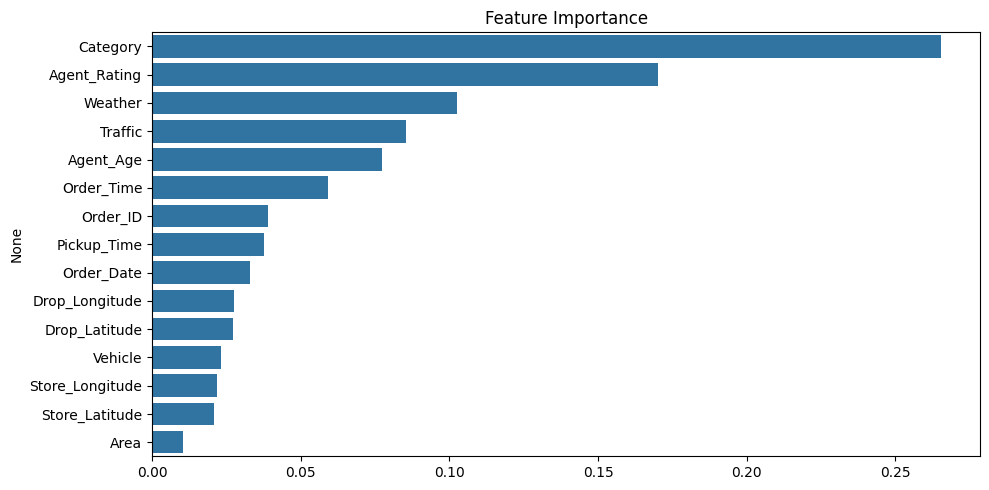

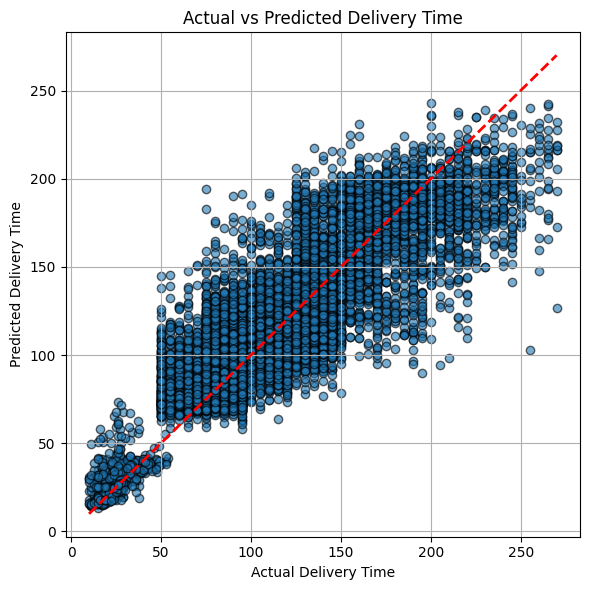

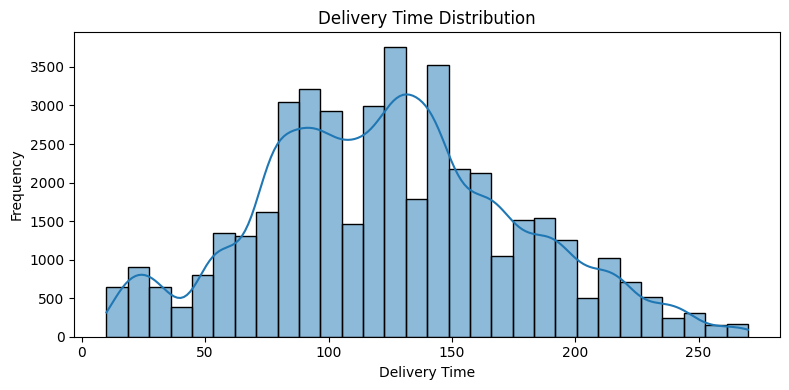


--- Predict Delivery Time for New Order ---
Order_ID options: ['aaar186826409', 'aabo036315307', 'aabo151954572', 'aabt975198794', 'aabx020665819', 'aaca221183558', 'aack303984035', 'aacn882394574', 'aacr165500044', 'aacu540600648', 'aaeg065438532', 'aaem314845836', 'aaer219698621', 'aaff291190267', 'aafr395199003', 'aagk068425859', 'aagp176989136', 'aaha266438982', 'aahf239075270', 'aahj033176282', 'aahu068587422', 'aaif308012919', 'aaje176609849', 'aaje387151563', 'aajt435956273', 'aakd221790790', 'aake032449569', 'aakj736513930', 'aakx537010761', 'aaky664006983', 'aalj579902611', 'aalq500110937', 'aalw325993899', 'aamx360757057', 'aamx862401407', 'aank525767567', 'aanq792564931', 'aaoa610787333', 'aaoe396115749', 'aaog641494638', 'aaoj938023229', 'aaol981600624', 'aapg596814071', 'aasf360944659', 'aatu545608987', 'aaua351776486', 'aaue857229941', 'aaun283082133', 'aavg384213040', 'aavg727493245', 'aavm876228553', 'aawu240208924', 'aaxc384839480', 'aayl993964994', 'aazb527937675', '

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# Load data
df = pd.read_csv("/content/amazon_delivery.csv")  # Make sure this CSV is in your working directory

# Preprocess
df.dropna(inplace=True)
label_encoders = {}

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    # Strip whitespace before fitting the encoder
    df[col] = df[col].str.strip()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Define features and target
target_col = "Delivery_Time" if "Delivery_Time" in df.columns else df.columns[-1]
X = df.drop(columns=[target_col])
y = df[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"\nModel Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot 1: Feature Importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

# Plot 2: Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("Actual vs Predicted Delivery Time")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 3: Distribution of Delivery Time
plt.figure(figsize=(8, 4))
sns.histplot(y, bins=30, kde=True)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Predict on user input
print("\n--- Predict Delivery Time for New Order ---")
user_input = {}
for col in X.columns:
    if col in label_encoders:
        classes = list(label_encoders[col].classes_)
        print(f"{col} options: {classes}")
        val = input(f"Enter {col}: ")
        # Strip whitespace from user input before transforming
        user_input[col] = label_encoders[col].transform([val.strip()])[0]
    else:
        val = float(input(f"Enter {col} (numeric): "))
        user_input[col] = val

input_df = pd.DataFrame([user_input])
prediction = model.predict(input_df)[0]
print(f"\n✅ Estimated Delivery Time: {prediction:.2f} days")